# Diapositivas clase 1

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

# para tener figuras interactivas dentro del cuaderno en VSCODE
# %matplotlib widget

# para obtener figuras interactivas como ventanas independientes
# %matplotlib qt5

# para obtener figuras no-interactivas 
#%matplotlib inline

## Generamos primero un señal ruidosa

**Ruido**: toda señal no deseada que se mezcla con la señal útil.

**Ruido blanco**: es una señal aleatoria que se caracteriza por el hecho de que sus valores de señal, en dos tiempos diferentes, no guardan correlación estadística. Como consecuencia de ello, su densidad espectral de potencia es una constante, es decir, su gráfica es plana

Supongamos entonces un caso de una señal periódica con dos componentes de diferentes frecuencias y algo de ruido “blanco”. A partir de esta señal vamos a pensar qué limitaciones puedo encontrar durante el proceso de digitalización y cuánto afecta a la información que poseía la señal original.

Durante el curso se espera que cada uno siga los ejemplos copiando las líneas y ejecutándolas en Python. De esta forma se espera que cada uno pueda probar algunas modificaciones y ver en el momento los efectos.

Como obviamente no podemos generar señales analógicas en Python, utilizaré una señal con una resolución alta en tiempo (tiempos de muestreo muy chicos) y en magnitud (muy precisas) haciendo las veces de señal analógica.  Luego probaremos qué sucede cuando muestreamos esta señal, simulando el proceso de digitalización.

In [2]:
dta = 0.001
Ta=20
Na = int(Ta/dta+1)
ta=np.linspace(0,Ta,Na)

f1=0.5
f2=0.05
noise = np.random.uniform(-0.2,0.2, Na)
signal_disc = np.sin(2*np.pi*ta*f1)+ np.sin(2*np.pi*ta*f2)
sa_disc = signal_disc + noise
sa = sc.interpolate.interp1d(ta, sa_disc)   # sa es una función que le entra a y saca un valor interpolado 
                                            # linealmente entre los punto de ta que si conoce. Una locura!

Nuestra señal de alta resolución la llamaremos `sa`. En este ejemplo tomamos una señal de 20 segundos de duración, con una resolución temporal de 1 ms y los valores serán de una precisión doble ('float64' en Python). La primera señal que vamos a utilizar se compone de dos senoidales con frecuencias de 0.5 Hz y de 0.05 Hz más ruido blanco  de distribución es uniforme.

Se llama ruido blanco a una señal aleatoria que posee una densidad espectral plana en todas las frecuencias. Es decir que la potencia de la señal se distribuye uniformemente en todo el rango de frecuencias. En este caso se genera con la función `uniform` del módulo `random` de `numpy` en Python, con valores uniformemente distribuidos entre los valores dados por el primer y segundo argumento de la función, y una cantidad de elementos Na.

No coloco unidades en el eje vertical porque en este caso no me interesa o no sé que señal estoy procesando.

Vemos en esta figura que tenemos un solo ciclo completo de la frecuencia menor y 10 de la frecuencia mayor.

Realizo la figura de la señal. Uso opciones de `matplotlib` no tan parecidas a las de `Matlab`, pero que dan mucho mejor control sobre la figura.

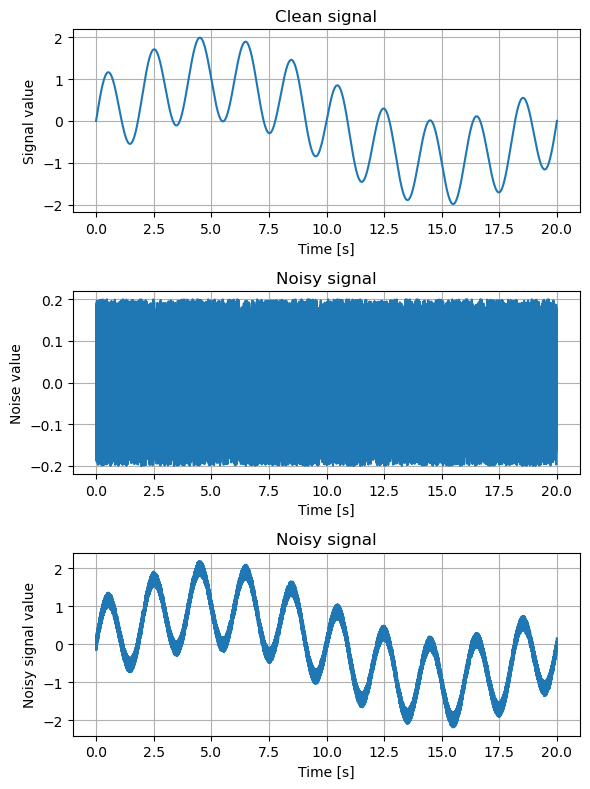

In [3]:
f, ax = plt.subplots(3, 1, figsize=(6,8)) # genero la figura f con 3 ejes ax
ax[0].plot(ta, signal_disc)
ax[0].grid()
ax[0].set_title('Clean signal')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Signal value')
ax[1].plot(ta, noise)
ax[1].grid()
ax[1].set_title('Noisy signal')
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Noise value')
ax[2].plot(ta, sa(ta))
ax[2].grid()
ax[2].set_title('Noisy signal')
ax[2].set_xlabel('Time [s]')
ax[2].set_ylabel('Noisy signal value')
f.tight_layout()  # para que no se superpongan las leyendas de los ejes

Ahora veamos qué sucede si digitalizamos la señal. Por ahora suponemos que no perdemos precisión pero sí resolución temporal. En este caso la frecuencia de muestreo, f sub d, es de 4 muestras por cada 10 segundo. Las muestras en Sd las obtenemos mediante la función `interp1`, que en realidad es excesivamente costosa para lo que estamos haciendo pero en este caso estoy sacrificando eficiencia para ser mas claro, creo. Eso nos da unos pocos puntos por ciclo de la frecuencia mas alta (6), pero más que suficientes para seguir la evolución de la señal. Obviamente parte del ruido blanco sigue existiendo en la medición, ya que ninguno de los puntos estará exactamente sobre la señal pura que obtendríamos sin agregar el ruido en sa.

Muestreo la señal, incluyendo los límites 0 y 20.

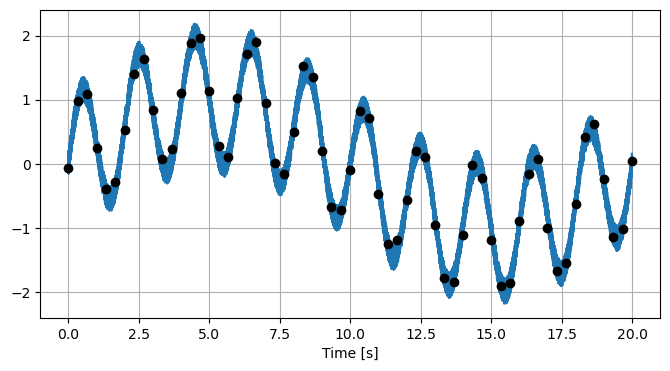

In [4]:
fs1=3
dts1=1/fs1 
ts1=np.linspace(0, 20, int(20/dts1)+1) # incluye el 20
sd1 = sa(ts1)

f, ax = plt.subplots(1, 1, figsize=(8,4))
ax.plot(ta, sa(ta))
ax.grid()
ax.set_xlabel('Time [s]')
ax.plot(ts1, sa(ts1), 'ko' )

Genero una función de interpolación 1d lineal y le aplico los puntos de la señal original.

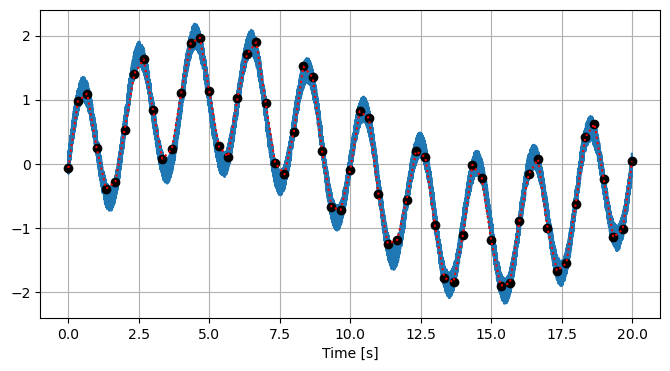

In [5]:
fci1 = sc.interpolate.interp1d(ts1, sd1)

ax.plot(ta, fci1(ta), 'r:' )
f # vuelvo a mostrar como salida la figura enterior

Ahora si continuamos reduciendo la frecuencia de muestreo `fd` hasta hacerla 1, vemos que todos los puntos caen aproximadamente sobre la función senoidal correspondiente a la frecuencia más baja.

Seguimos viendo el efecto del ruido ya que los puntos no caen exactamente sobre esa función, pero hemos perdido totalmente la información correspondiente a la fluctuación senoidal de frecuencia más alta.

Notemos que la frecuencia de muestreo (o de digitalización) es el doble de la frecuencia de esa senoidal. Es decir, para poder ver una componente de cierta frecuencia tenemos que utilizar una frecuencia de muestreo mayor al doble. A esto se le llama el teorema del muestreo, que básicamente estipula que para conservar la información de una señal de una frecuencia dada se debe muestrear con al menos el doble de la frecuencia de interés
Puesto de esta forma, un tanto aproximada, pareciera que la frecuencia de muestreo debería ser mucho mayor al doble de la frecuencia que quiero conservar para que la reconstrucción realmente funcione.

Esto es cierto para una señal como la que tenemos en la figura!!!!! Pero el teorema de muestreo considera señales de una longitud temporal infinita y por lo tanto la información para la reconstrucción se compila de una cantidad de datos infinitos, por lo cual el limite está impuesto exactamente por la frecuencia de Nyquist.

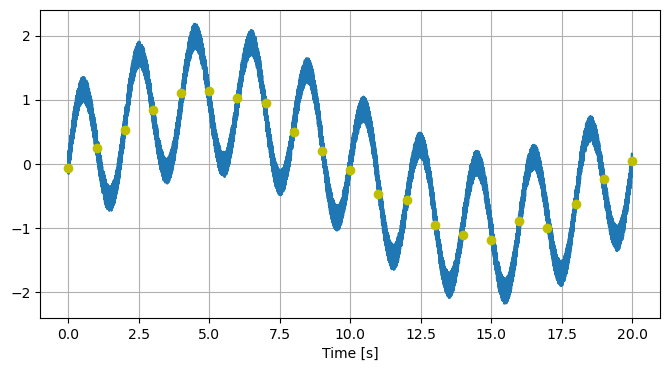

In [6]:
fs2=1
dts2=1/fs2 
ts2=np.linspace(0, 20, int(20/dts2)+1) # incluye el 20
sd2 = sa(ts2)

f, ax = plt.subplots(1, 1, figsize=(8,4))
ax.plot(ta, sa(ta))
ax.grid()
ax.set_xlabel('Time [s]')
ax.plot(ts2, sd2, 'yo' )

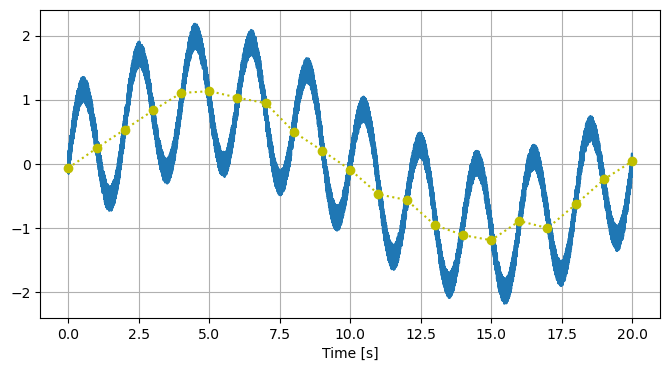

In [7]:
fci2 = sc.interpolate.interp1d(ts2, sd2)
ax.plot(ta, fci2(ta), 'y:' )
f

En realidad el teorema de Nyquist-Shannon dice que la señal se puede recuperar de forma exacta si siendo:

$$F_{max} = B$$

$$F_{s}>2F_{max}\equiv 2B$$

Donde $F_{max}$ es la frecuencia máxima de la señal, $F_s$ es la frecuencia de muestreo. La señal original $s_a$ se puede recuperar con la función de interpolación:

$$g(t)={\frac {\sin 2\pi Bt}{2\pi Bt}}$$

Haciendo:

$$x_{a}(t)=\sum _{n=-\infty }^{\infty }x_{a}\left({\frac {n}{F_{s}}}\right)g\left(t-{\frac {n}{F_{s}}}\right)$$

En los casos anteriores no reconstruimos la señal utilizando la función de interpolación anterior, sino que lo hicimos usando una función de interpolación lineal.

Este teorema no da una límite inferior del muestreo de la señal. En general deberemos muestrear con una frecuencia mayor debido a:

- presencia de frecuencias mayores a la esperada (producen el fenómeno de aliasing)
- errores de cuantización
- número finitos de muestras

La siguiente pregunta es “qué sucede si reduzco aún más la frecuencia de muestreo?”

Ahora vamos a reducir aún más la frecuencia de muestreo, a un valor de 0.7 muestras por segundo. Ahora las muestras vuelven a mostrar información relacionada con ambas componentes, la de 0.05 Hz y la de 0.5 Hz.

Sin embargo, no podemos reconstruir la señal de alta frecuencia a partir de estos datos. De hecho vamos a ver que podemos ajustar los puntos con una señal construida a partir de dos senoidales pero una de ellas de una frecuencia menor.

In [8]:
fs3=0.7
dts3=1/fs3
ts3=np.linspace(0, 20, int(20/dts3)+1) # incluye el 20
sd3 = sa(ts3)

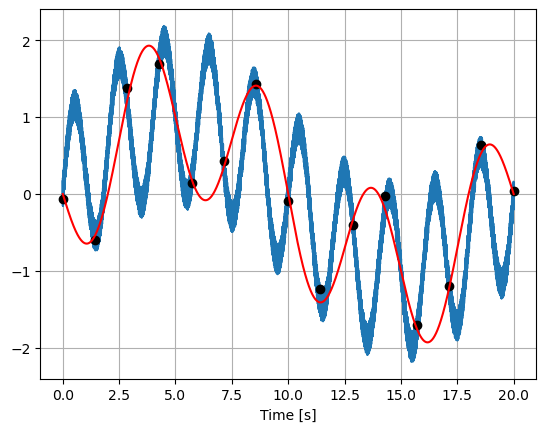

In [9]:
s_al=np.sin(2*np.pi*ta*(f1-fs3))+np.sin(2*np.pi*ta*f2);

f, ax = plt.subplots(1, 1)
ax.plot(ta, sa(ta))
ax.plot(ts3, sd3, 'ok')
ax.plot(ta, s_al, 'r' )
ax.grid()
ax.set_xlabel('Time [s]');

Si bien los puntos se pueden ajustar bien mediante la señal original, obviamente, también se pueden ajustar mediante una nueva función compuesta por la frecuencia menor, de 0,05 Hz y otra menor a la original de 0,5 Hz. De hecho la nueva componente es menor también a la frecuencia de Nyquist y es f1 – fd.

Esta frecuencia es negativa, lo cual puede interpretarse como un cambio de fase de 180° o 2$\pi$. Evidentemente para poder continuar este análisis vamos a tener que utilizar una herramienta matemática que nos permita ver qué pasa con los componentes de la señal cuando es muestreada. Esa herramienta es la Transformada de Fourier. Continuaremos entonces hablando sobre la Transformada de Fourier y luego volveremos sobre este tema pero utilizando la Transformada de Fourier como herramienta.

### Ejercicios

Correr los “scripts” de Matlab de las filminas anteriores pero con las siguientes modificaciones:

- Agregar una fase a cada una de las funciones seno que constituyen la señal que simula ser analógica y ver qué sucede con los diferentes muestreos.
- Agregar a la señal una componente cosenoidal con frecuencia igual a la tasa de muestreo fd.
- Realizar algunas pruebas modificando las frecuencias f1, f2 y fd.